In [1]:
pip install azureml-contrib-dataset

Note: you may need to restart the kernel to use updated packages.


In [7]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
# azureml-contrib-dataset of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset
import azureml.contrib.dataset
from azureml.contrib.dataset import FileHandlingOption

subscription_id = 'f4e38537-3cac-4f8c-96c6-f3e049a64832'
resource_group = 'machine'
workspace_name = 'modelling'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='cakesclassifications_20210521_155727')
cake_pd = dataset.to_pandas_dataframe(file_handling_option=FileHandlingOption.DOWNLOAD, target_path='./download/', overwrite_download=True)

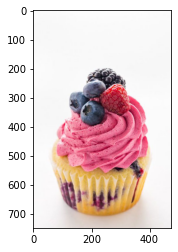

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#read images from downloaded path
img = mpimg.imread(cake_pd.loc[8,'image_url'])
imgplot = plt.imshow(img)


<class 'torch.Tensor'>


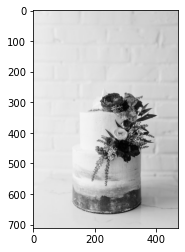

In [10]:
from torchvision.transforms import functional as F

# load animal_labels dataset into torchvision dataset
pytorch_dataset = dataset.to_torchvision()
img = pytorch_dataset[0][0]
print(type(img))

# use methods from torchvision to transform the img into grayscale
pil_image = F.to_pil_image(img)
gray_image = F.to_grayscale(pil_image, num_output_channels=3)

imgplot = plt.imshow(gray_image)